# US Medical Insurance Costs

This project will look at insurance costs and consider the impact of where a person lives on their insurance cost. An analyzation of the different factors that contribute to insurance costs will be considered to determine why insurance costs in one area are, on average higher than other areas. Factors that will be considered are as follows: The sex of the insured, the number of children in the household, the bmi of the insured, the age of the insured and if the insured is a smoker or not. We will contrast these factors for both the region with the highest cost and the region with the lowest cost to determine if any patterns emerge that would lead to a higher average insurance cost in one region versus another.

The data used in this project is taken from a survey of health insurance holders of various different backgrounds. To begin the analysis, the data was split into lists for each factor that would be considered

In [73]:
import csv
import matplotlib.pyplot as plt
import numpy as np

age = []
sex = []
bmi = []
children = []
smoker_status = []
region = []
charges = []

with open("insurance.csv", newline = '') as ins_file:
    reader = csv.DictReader(ins_file)
    for row in reader:
        age.append(row['age'])
        sex.append(row['sex'])
        bmi.append(row['bmi'])
        children.append(row['children'])
        smoker_status.append(row['smoker'])
        region.append(row['region'])
        charges.append(row['charges'])

The average cost for each region was calculated to find the region with the highest average cost and the lowest average cost.

In [74]:
def average_cost(cost, factor, param):
    sum_of_cost = 0
    total_in_factor = 0
    i = 0
    while i < len(cost):
        if factor[i] == param:
            sum_of_cost += float(cost[i])
            total_in_factor += 1
        i = i + 1
    return round(sum_of_cost/total_in_factor, 2)

avg_cost_for_sw = average_cost(charges, region, "southwest")
avg_cost_for_nw = average_cost(charges, region, "northwest")
avg_cost_for_se = average_cost(charges, region, "southeast")
avg_cost_for_ne = average_cost(charges, region, "northeast")



print("The average cost for someone living in the southwest is " + str(avg_cost_for_sw))
print("The average cost for someone living in the northwest is " + str(avg_cost_for_nw))
print("The average cost for someone living in the southeast is " + str(avg_cost_for_se))
print("The average cost for someone living in the northeast is " + str(avg_cost_for_ne))
print("The greatest difference is " + str(round(avg_cost_for_se - avg_cost_for_sw, 2)))


The average cost for someone living in the southwest is 12346.94
The average cost for someone living in the northwest is 12417.58
The average cost for someone living in the southeast is 14735.41
The average cost for someone living in the northeast is 13406.38
The greatest difference is 2388.47


An initial analysis shows that the average cost in the South West is the lowest, at $12,346.94 and the South East has the highest average cost at 
$14,735.41.  That's a difference of $2,388.47.

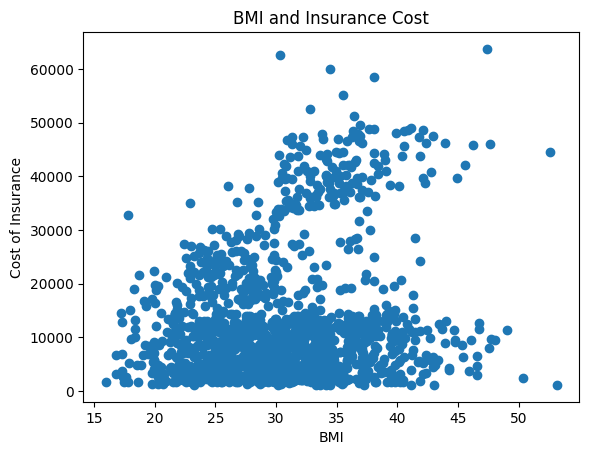

In [75]:
bmi_to_charge = []

def create_bmi_to_charge():
    i = 0
    while i < len(bmi):
        bmi_to_charge.append([bmi[i], charges[i]])
        i += 1
    return bmi_to_charge

create_bmi_to_charge()

bmi_to_charge = sorted(bmi_to_charge, key=lambda x: x[1])



x = []
y = []

def create_cost_to_bmi_plot():
    i = 0
    while i < len(bmi_to_charge):
        x.append(float(bmi_to_charge[i][0]))
        y.append(float(bmi_to_charge[i][1]))
        i += 1



create_cost_to_bmi_plot()

plt.scatter(x, y)
plt.xlabel("BMI")
plt.ylabel("Cost of Insurance")
plt.title("BMI and Insurance Cost")
plt.show()

This section shows a scatter plot for all regions in terms of bmi and how it generally can affect the cost of insurance.  

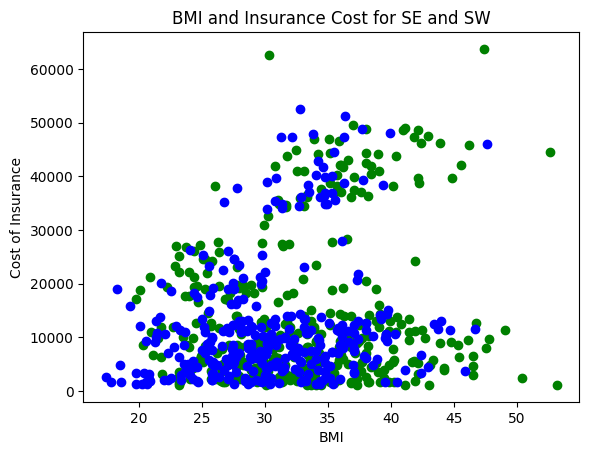

Percentage of sample from the Southeast with BMI greater than 41: 9.3
Percentage of sample from the Southwest with BMI greater than 41: 3.1


In [76]:
def create_bmi_region_cost(current):
    i = 0
    bmi_to_cost_reg = []
    while i < len(bmi):
        if region[i] == current:
            bmi_to_cost_reg.append((float(bmi[i]), float(charges[i])))
        i += 1
    return bmi_to_cost_reg

bmi_southeast_cost = sorted(create_bmi_region_cost("southeast"), key = lambda x: x[1])

bmi_southwest_cost = sorted(create_bmi_region_cost("southwest"), key = lambda x: x[1])

x1 = []
y1 = []
x2 = []
y2 = []

for i in range(0, len(bmi_southeast_cost)):
    x1.append(bmi_southeast_cost[i][0])
    y1.append(bmi_southeast_cost[i][1])

for i in range(0, len(bmi_southwest_cost)):
    x2.append(bmi_southwest_cost[i][0])
    y2.append(bmi_southwest_cost[i][1])

plt.scatter(x1, y1, color = "g")
plt.scatter(x2, y2, color = "b")
plt.xlabel("BMI")
plt.ylabel("Cost of Insurance")
plt.title("BMI and Insurance Cost for SE and SW")
plt.show()

def percent_above_x(li, mass):
    count = 0
    for i in range(0, len(li)):
        if mass <= li[i][0]:
            count += 1
    return count/len(li)*100



print("Percentage of sample from the Southeast with BMI greater than 41: " + str(round(percent_above_x(bmi_southeast_cost, 42), 1)))
print("Percentage of sample from the Southwest with BMI greater than 41: " + str(round(percent_above_x(bmi_southwest_cost, 42), 1)))









Without filtering out any other factors, it can be seen that 9.3% of insured people from the Southeast have a BMI higher than 41, while only 3.1% of those from the Southwest have a higher BMI than 41.  This is possibly a factor that is causing the insurance costs in the Southeast to be higher than those in the Southwest.

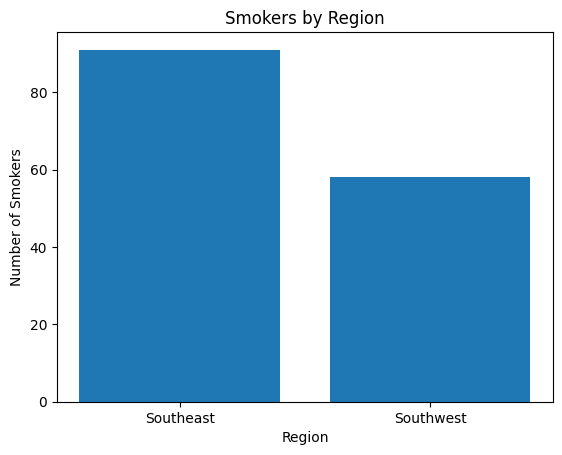

Percentage of smokers in Southeast: 25
Percentage of smokers in Southwest: 18


In [77]:
def number_of_smokers(reg):
    count = 0
    for i in range(len(region)):
        if smoker_status[i] == "yes" and region[i] == reg:
            count += 1
    return count

x = ["Southeast", "Southwest"]
y = [number_of_smokers("southeast"), number_of_smokers("southwest")]

plt.bar(x, y)
plt.xlabel("Region")
plt.ylabel("Number of Smokers")
plt.title("Smokers by Region")
plt.show()


print("Percentage of smokers in Southeast: " + str(round(number_of_smokers("southeast")/len(bmi_southeast_cost)*100)))
print("Percentage of smokers in Southwest: " + str(round(number_of_smokers("southwest")/len(bmi_southwest_cost)*100)))

Another factor that could contribute to the higher average cost of insurance in the Southeast is the percentage of smokers in the region. One fourth of those included in the study from the Southeast are smokers.    

In [78]:
males_in_se = 0
females_in_se = 0
males_in_sw = 0
females_in_sw = 0

for i in range(0, len(region)):
    if region[i] == "southeast" and sex[i] == "male":
        males_in_se += 1
    elif region[i] == "southeast" and sex[i] == "female":
        females_in_se += 1
    elif region[i] == "southwest" and sex[i] == "male":
        males_in_sw += 1
    elif region[i] == "southwest" and sex[i] == "female":
        females_in_sw += 1

print("There are " + str(males_in_se) + " men represented in the Southeast")
print("There are " + str(females_in_se) + " women represented in the Southeast")
print("There are " + str(males_in_sw) + " men represented in the Southwest")
print("There are " + str(females_in_sw) + " women represented in the Southwest")


def average_price_by_sex(current, reg):
    count = 0
    total = 0
    for i in range(0, len(region)):
        if sex[i] == current and region[i] == reg:
            count += 1
            total += float(charges[i])
    return total/count 

print("The average price for males in the Southeast is $" + str(round(average_price_by_sex("male", "southeast"), 2)))
print("The average price for females in the Southeast is $" + str(round(average_price_by_sex("female", "southeast"), 2)))
print("The average price for males in the Southwest is $" + str(round(average_price_by_sex("male", "southwest"), 2)))
print("The average price for females in the Southwest is $" + str(round(average_price_by_sex("female", "southwest"), 2)))

print("The difference between what men pay and what women pay in the southeast is $" + str(round(average_price_by_sex("male", "southeast") - average_price_by_sex("female", "southeast"), 2)))
print("The difference between what men pay and what women pay in the southwest is $" + str(round(average_price_by_sex("male", "southwest") - average_price_by_sex("female", "southwest"), 2)))


There are 189 men represented in the Southeast
There are 175 women represented in the Southeast
There are 163 men represented in the Southwest
There are 162 women represented in the Southwest
The average price for males in the Southeast is $15879.62
The average price for females in the Southeast is $13499.67
The average price for males in the Southwest is $13412.88
The average price for females in the Southwest is $11274.41
The difference between what men pay and what women pay in the southeast is $2379.95
The difference between what men pay and what women pay in the southwest is $2138.47


Another factor that seems to affect the average cost of insurance in the southeast is the average cost that males pay coupled with the difference in how many men were included in the study.  There were 14 more men included for the Southeast, and only one more man included in the Southwest.  The difference in cost between men and women is less than $300.

While this anomaly in the data accounts for some of the difference between the costs in the Southeast and Southwest, it is not significant enough of a difference to discount the previous analysis.

In [79]:
avg_child_se = 0
avg_child_sew = 0



def average_children_builder(reg):
    child = 0
    count = 0
    for i in range(0, len(region)):
        if region[i] == reg:
            child += int(children[i])
            count += 1

    return round(child/count, 2)

avg_child_se = average_children_builder("southeast")
avg_child_sw = average_children_builder("southwest")

print("The average number of children per insured in the southeast: " + str(avg_child_se))
print("The average number of children per insured in the southwest: " + str(avg_child_sw))


The average number of children per insured in the southeast: 1.05
The average number of children per insured in the southwest: 1.14


One factor that is almost exactly the same in both regions is the average number of children per insured.  So, this can be eliminated as a factor in what is causing the average price in the Southeast to be higher than that in the Southwest. In fact, those in the Southeast have less children, on average, than those in the Southeast

In [80]:
def average_age_builder(reg):
    years = 0
    count = 0
    for i in range(0, len(region)):
        if region[i] == reg:
            years += int(age[i])
            count += 1
    return round(years/count, 2)

avg_age_se = average_age_builder("southeast")
avg_age_sw = average_age_builder("southwest")

print("The average of age per insured in the southeast: " + str(avg_age_se))
print("The average of age per insured in the southwest: " + str(avg_age_sw))

The average of age per insured in the southeast: 38.94
The average of age per insured in the southwest: 39.46


Another factor that seems we can elimiate is that of age.  Those in the Southwest are on average a little older than those in the Southeast.

# Conclusion

With other factors, that of average age and average number of children, it would seem that the two largest contributors to the difference in average price between the Southeast and Southwest are those of bmi, with almost 10% of those in the Southeast having a bmi higher than 41, and the number of smokers.  Smokers make up 1/4 of those in the Southeast.